___About Dataset___

__Context__

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 

__Content__

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

__The data set includes information about:__

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [47]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Expolaratory Data Analysis and Preprocessing

In [48]:
pd.options.display.max_columns = None
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 11 customers whose tenure is 0 means they are new customers their monthly charges are
available but total charges are not available in dataset. Since it is fairly small amount, i've dropped them

In [50]:
df[df.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [51]:
# dropping them
df.drop(index=df[df.tenure == 0].index, inplace = True)

In [52]:
# Converting TotalCharges column to float data type
df.TotalCharges = df.TotalCharges.astype('float')

In [53]:
# Useless to our analysis and model
df.drop(columns = 'customerID', inplace = True)

In [54]:
# Descriptive statistical information about continous numerical features
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[continuous_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [55]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: [0 1]
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Churn: ['N

Some of the Categorical features in dataset have values representing Yes or No and some have additional values like no phone service and no internet service those can be combined with No category values.

In [56]:
df['MultipleLines'] = df['MultipleLines'].str.replace('No phone service', 'No')

no_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
              'StreamingMovies']
for col in no_internet:
    df[col] = df[col].str.replace('No internet service', 'No')

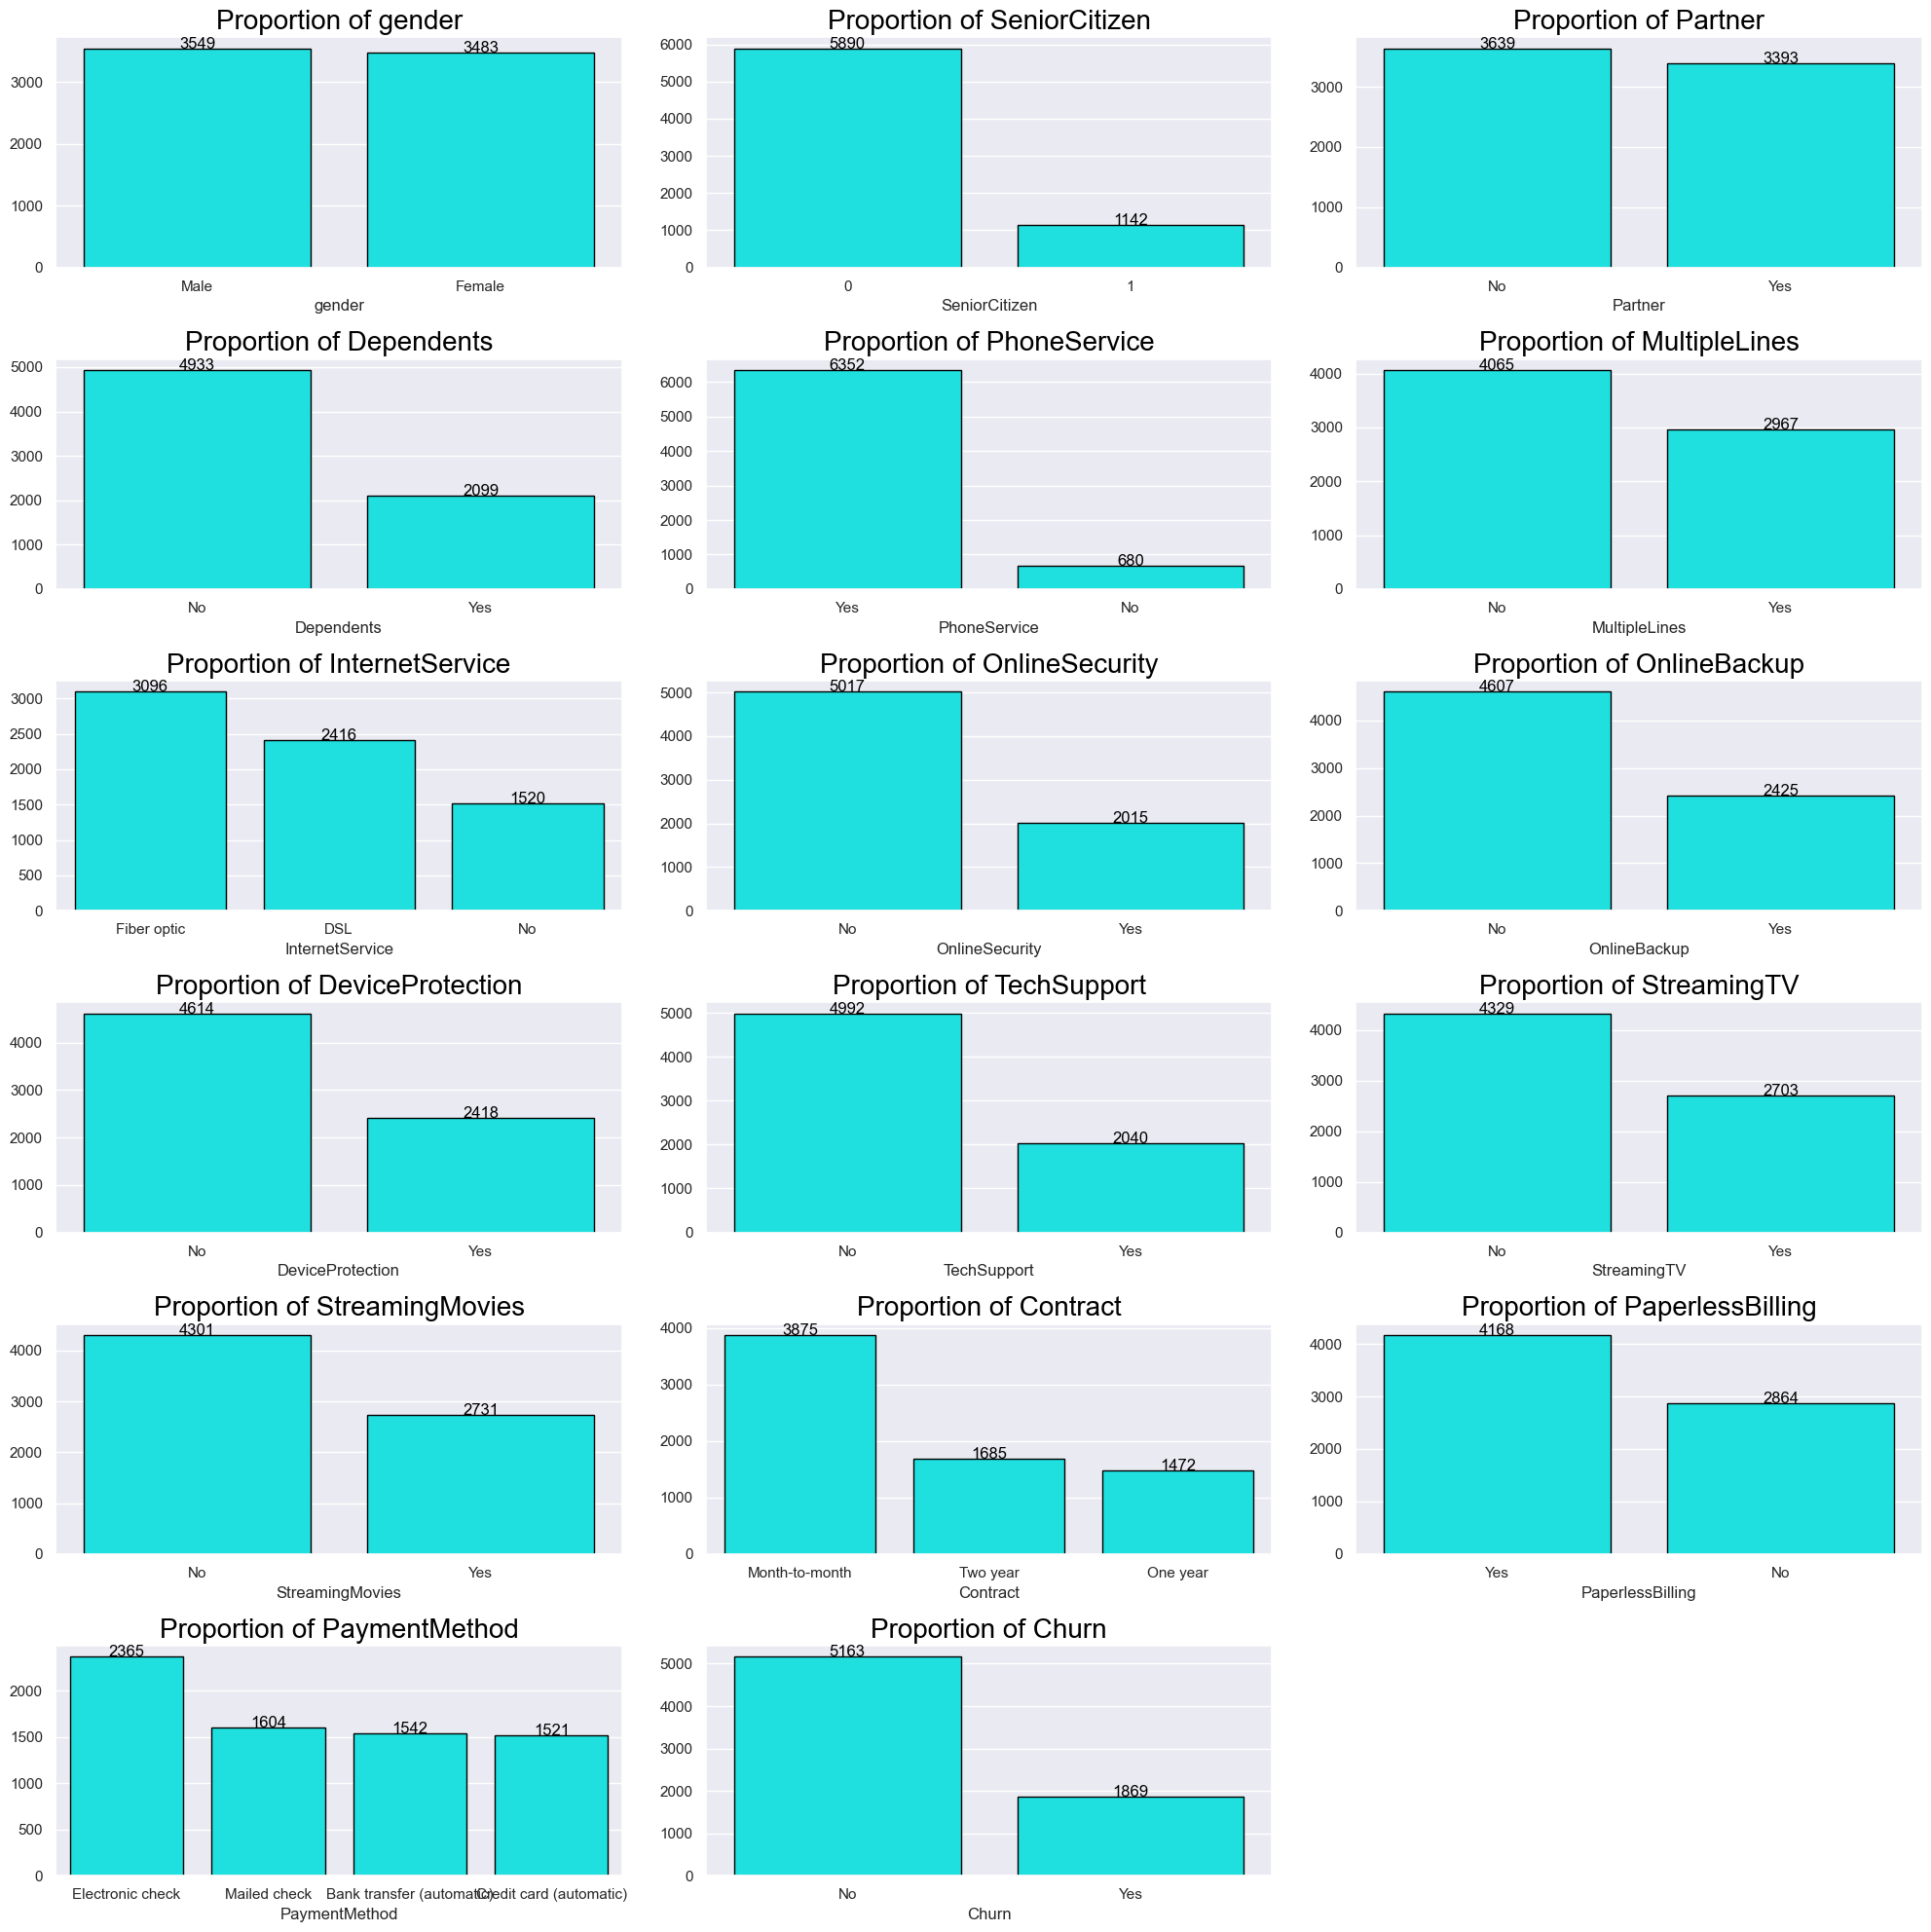

In [57]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20, 20))
pt = 1
for col in categorical_cols:
    plt.subplot(6, 3, pt)
    sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts().values, 
                   color = 'cyan', edgecolor = 'black')
    for i, j in enumerate(df[col].value_counts().values):
        plt.text(i,j, str(j)[:4], ha= 'center', color = 'black')
        
    plt.title(f'Proportion of {col}', color = 'black', fontsize = 20)
    pt+=1

plt.tight_layout()
plt.show() 

In [58]:
df.select_dtypes('number').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

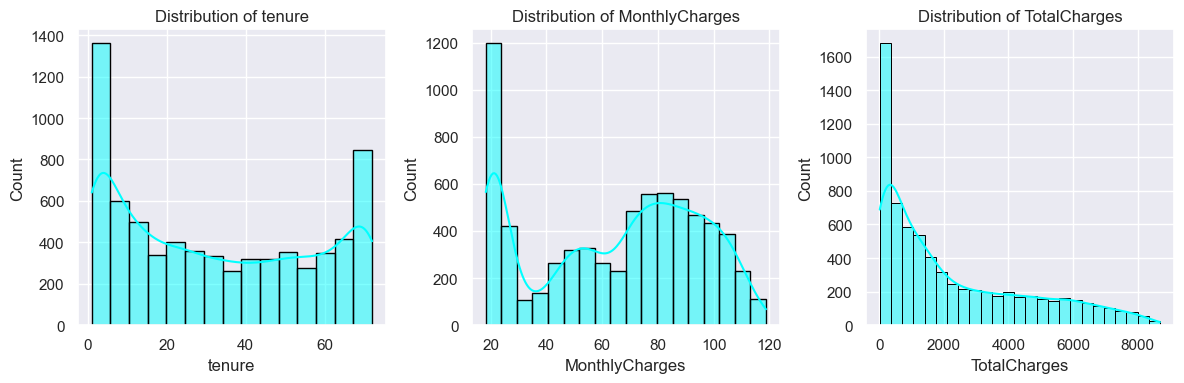

In [59]:
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(12, 4))
pt= 1
for col in continuous_cols:
    plt.subplot(1, 3, pt)
    sns.histplot(df[col], kde = True, color = 'cyan', edgecolor = 'black')
    plt.title(f'Distribution of {col}')
    pt+=1

plt.tight_layout()
plt.show()

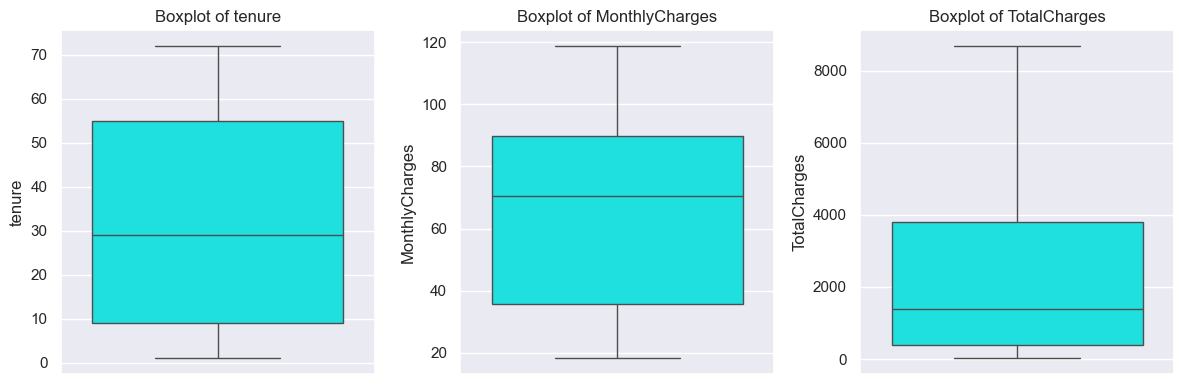

In [60]:
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 4))
pt= 1
for col in continuous_cols:
    plt.subplot(1, 3, pt)
    sns.boxplot(df[col], color = 'cyan')
    plt.title(f'Boxplot of {col}')
    pt+=1

plt.tight_layout()
plt.show()

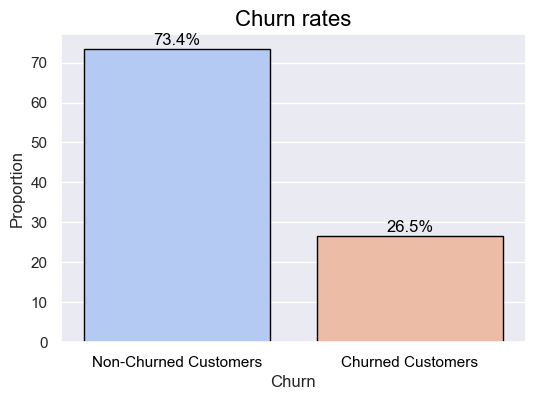

In [61]:
plt.figure(figsize=(6, 4))
sns.barplot(x = df.Churn.value_counts(normalize= True).index, y = df.Churn.value_counts(normalize= True).values * 100, 
           palette='coolwarm', edgecolor = 'black')
for i, j in enumerate(df.Churn.value_counts(normalize= True).values * 100):
        plt.text(i,j + 1, str(j)[:4]+'%', ha= 'center', color = 'black')
plt.ylabel('Proportion')
plt.xticks([0,1], ['Non-Churned Customers', 'Churned Customers'], color = 'black')
plt.title('Churn rates', color = 'black', fontsize =16)
plt.show()

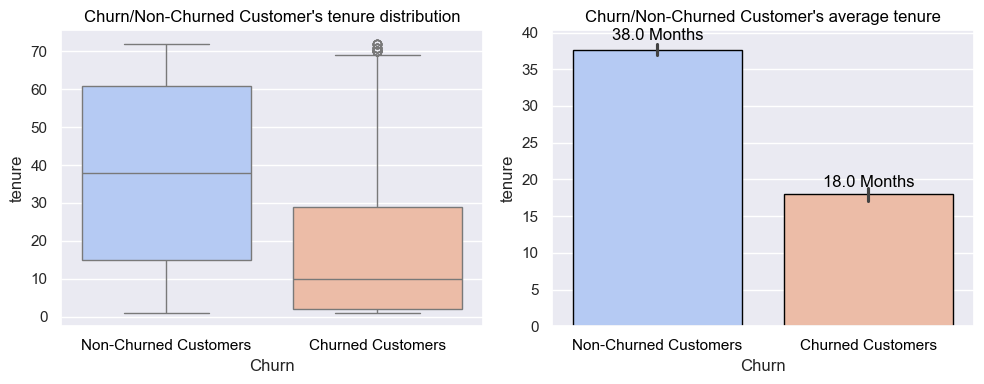

In [62]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x = df.Churn, y=df.tenure, palette='coolwarm')
plt.xticks([0,1], ['Non-Churned Customers', 'Churned Customers'], color = 'black')
plt.title("Churn/Non-Churned Customer's tenure distribution", color = 'black')

plt.subplot(1, 2, 2)
sns.barplot(x = df.Churn, y=df.tenure, palette='coolwarm', edgecolor='black')
plt.xticks([0,1], ['Non-Churned Customers', 'Churned Customers'], color = 'black')
for i, j in enumerate(np.round(df.groupby(by='Churn')['tenure'].mean().values)):
        plt.text(i,j+1, str(j)+ ' Months', ha= 'center', color = 'black')
plt.title("Churn/Non-Churned Customer's average tenure", color = 'black')

plt.tight_layout()
plt.show()

In [63]:
means = np.round(df.groupby(by=['Contract', 'Churn'])['MonthlyCharges'].mean().values, 2)
means 

array([61.46, 73.02, 62.54, 85.05, 60.11, 86.78])

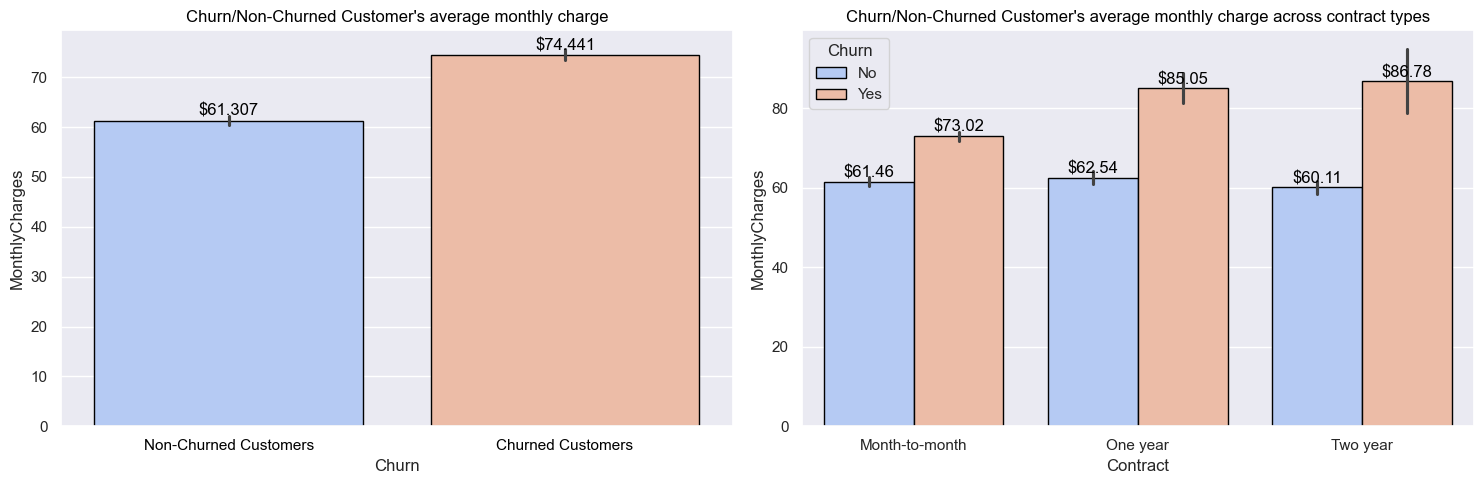

In [64]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df.Churn, y = df.MonthlyCharges, palette='coolwarm', edgecolor='black')
plt.xticks([0,1], ['Non-Churned Customers', 'Churned Customers'], color = 'black')
for i, j in enumerate(np.round(df.groupby(by='Churn')['MonthlyCharges'].mean().values,3)):
        plt.text(i,j+1, '$'+str(j), ha= 'center', color = 'black')
plt.title("Churn/Non-Churned Customer's average monthly charge", color = 'black')

plt.subplot(1, 2, 2)
sns.barplot(x=df['Contract'], y=df['MonthlyCharges'], hue=df['Churn'], palette='coolwarm', edgecolor='black')
means = [61.46, 62.54, 60.11,
         73.02, 85.05, 86.78]

positions = [p.get_x() + p.get_width() / 2 for p in plt.gca().patches]
for i, mean in enumerate(means):
    # Annotate the mean value at the correct bar position
    plt.text(positions[i], mean + 1, '$'+str(mean), ha='center', color='black')
    
plt.title("Churn/Non-Churned Customer's average monthly charge across contract types", color = 'black')

plt.tight_layout()
plt.show()

Churned Customers were paying higher monthly charge than no-churned customers. So, We should we focus on customers who are paying higher average monthly charge to retain them.

In [65]:
df.groupby(by='Contract')['Churn'].value_counts(normalize= True).reset_index()

,Contract,Churn,proportion
0,Month-to-month,No,0.572903
1,Month-to-month,Yes,0.427097
2,One year,No,0.887228
3,One year,Yes,0.112772
4,Two year,No,0.971513
5,Two year,Yes,0.028487


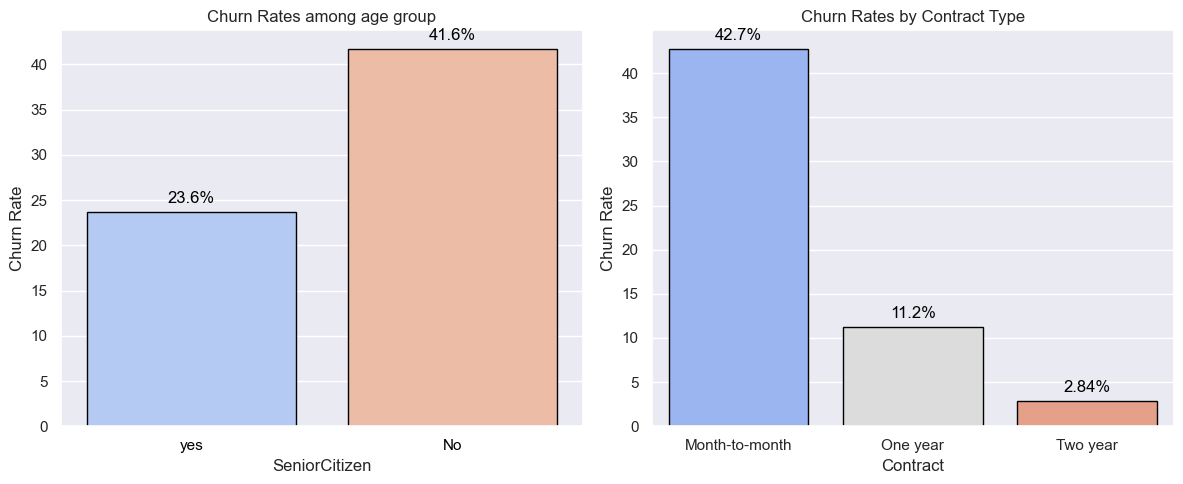

In [66]:

churn_rate_senior = df.groupby(by='SeniorCitizen')['Churn'].value_counts(normalize= True).unstack()['Yes']
plt.figure(figsize = (12, 5))
plt.subplot(1,2, 1)
sns.barplot(x = churn_rate_senior.index, y = churn_rate_senior.values * 100, 
           palette='coolwarm', edgecolor = 'black')
for i, j in enumerate(churn_rate_senior.values * 100):
        plt.text(i,j + 1, str(j)[:4]+'%', ha= 'center', color = 'black')
    
plt.ylabel('Churn Rate')
plt.xticks([0,1], ['yes', 'No'], color = 'black')
plt.title('Churn Rates among age group')

churn_rate_by_contract = df.groupby(by='Contract')['Churn'].value_counts(normalize = True).unstack()['Yes']
plt.subplot(1,2, 2)
sns.barplot(x = churn_rate_by_contract.index, y = churn_rate_by_contract.values * 100, 
           palette='coolwarm', edgecolor = 'black')
for i, j in enumerate(churn_rate_by_contract.values * 100):
        plt.text(i,j + 1, str(j)[:4]+'%', ha= 'center', color = 'black')
    
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Contract Type')


plt.tight_layout()
plt.show()


We can see that month-to-month contract type has highest churn rate of 42.2% and senior citizen customer are more loyal

## Feature Selection

In [67]:
features = df.drop(columns='Churn')
target = df['Churn']

* The Chi-Squared Test of Independence evaluates the association between two categorical variables. The null hypothesis for this test is that there is no relationship between our target variable and the categorical feature, and the alternative hypothesis is that that there is a relationship. 
* Looking at the results of the tests, Gender and PhoneService have very small chi-squared statistics and p-values that are greater than the significance threshold, alpha of 0.05, indicating they are independent of our target variable. Accept the null hypothesis that there is no relationship between our target variable and the categorical feature.
* The rest of the categorical features do have a statistically significant association to customer churn

In [68]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
# encoding features
encoder = LabelEncoder()
for col in categorical_cols:
    features[col] = encoder.fit_transform(features[col])

# encoding target variable
encoder = LabelEncoder()
target = encoder.fit_transform(target)

# applying the chi-square statistics test
chi2_val, p_val = chi2(features[categorical_cols], target)


In [69]:
feature_selection = pd.DataFrame(chi2_val, columns = ['Chi-Squared Value'], index = categorical_cols)
feature_selection['P-value'] = np.round(p_val, 3)
feature_selection

,Chi-Squared Value,P-value
gender,0.254297,0.614
Partner,81.857769,0.000
Dependents,131.271509,0.000
PhoneService,0.092948,0.760
MultipleLines,6.514651,0.011
InternetService,9.715269,0.002
OnlineSecurity,147.165601,0.000
OnlineBackup,31.209832,0.000
DeviceProtection,20.216007,0.000
TechSupport,135.439602,0.000


In [70]:
# here i dropped less significant categorical variables whose p-value is greater than 0.05
features.drop(columns = ['gender', 'PhoneService'], inplace = True)

Collinearity of TotalCharges with tenure is 0.83 means they are highly correlated, it suggests that these features are closely related and may contain overlapping information. This situation is often referred to as multicollinearity,
I'll remove one of them to reduce redundancy and improve model performance.

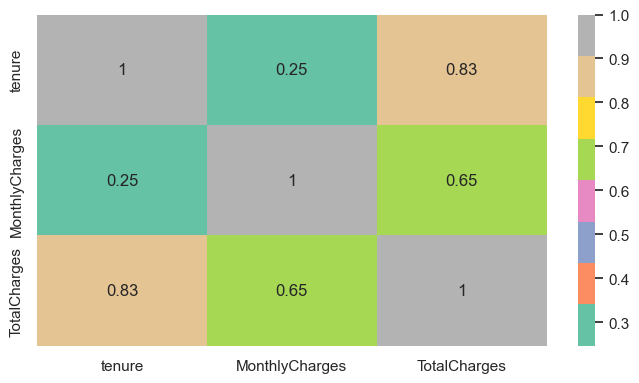

In [71]:
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation = features[continuous_cols].corr()

plt.figure(figsize = (7, 4))
sns.heatmap(correlation, annot=True, cmap = 'Set2')
plt.tight_layout()
plt.show()

## Feature Engineering

In [72]:
x = df.drop(columns = ['gender', "PhoneService", 'TotalCharges', 'Churn']) # independent features
y = df.Churn # dependent target variable

In [73]:
from sklearn.model_selection import train_test_split
# spliting the dataset for training and testing the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5625, 16), (1407, 16), (5625,), (1407,))

In [74]:
# encoding the categorical features for model training
from sklearn.preprocessing import LabelEncoder

categorical_cols = [ 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    x_train[col] = encoder.fit_transform(x_train[col])
    x_test[col] = encoder.transform(x_test[col])
    encoders[col] = encoder  

In [75]:
# encoding the target variable
target_encoder = LabelEncoder()

y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

In [76]:
# standardizing the continuous numerical featuers so that no particular feature dominates others in training
from sklearn.preprocessing import StandardScaler

num_col = ['tenure', 'MonthlyCharges']

scaler = StandardScaler()
x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

We can noticed here that distribution of classes is not uniform that could lead to biased model as algorithms tend to favour the majority class, affecting the models ability to predict the minority class accurately.

In [77]:
y_train[y_train==0].shape, y_train[y_train==1].shape

((4122,), (1503,))

I will use a synthetic minority over-sampling technique known as SMOTE to create a more evenly distributed training set.
* It first identifies the instances belonging to the minority class.
* For each instance in the minority class, SMOTE selects one or more of its nearest neighbors (typically using Euclidean distance).
* It then creates new synthetic samples by choosing a random point along the line between the current instance and its selected neighbor(s). The synthetic samples are not exact copies of existing samples but are newly generated data points that help the minority class to "fill in" the gaps in the feature space.

Applying SMOTE across models can help ensure that we're not favoring one model simply because it is biased toward the majority class. If SMOTE improves performance for models that perform poorly on the minority class, we'll be able to make a more informed decision about which model to choose.

In [78]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy= 0.7, random_state=1)
x_train_balanced, y_train_balanced = oversample.fit_resample(x_train, y_train)
x_train_balanced.shape, y_train_balanced.shape


((7007, 16), (7007,))

SMOTE may generate synthetic points that are too similar to the existing data, leading to overfitting and they can dilute the influence of the actual data. So I've used 60%-40% class distribution that is also effective, avoiding to make more synthetic points for minority class, 40% also works.

In [79]:
y_train_balanced[y_train_balanced==0].shape, y_train_balanced[y_train_balanced==1].shape

((4122,), (2885,))

## Model Selection and Hyperparameter Tuning

In [80]:
# creating an instance of classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [81]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}
# predefined set of hyperparameter values
param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 2, 10,20], 'solver': ['lbfgs', 'liblinear'], 'penalty' : ['l1', 'l2', 'elasticnet']},
    "Support Vector Classifier": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Decision Tree": {'max_depth': [3, 5, 7, 10, 15], 'min_samples_split': [2, 5, 10]},  
    "Random Forest": {'n_estimators': [50, 100], 'max_depth': [10, 15], 'min_samples_split': [2, 5]},
    "Gradient Boosting": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth' : [3, 4, 5]},
    "XGBoost": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth': [3, 5]}
}

Here i've used stratified K-fold cross validation techniques similar to K-fold but ensures that each fold has a proportional representation of each class, this helps in avoiding issues where a fold might not have sufficient samples from the minority class, which is useful for our imbalanced class.\
When combined with Stratified K-fold, Grid Search ensures that our model is trained and validated multiple times with a proportional distribution of classes, leading to more reliable results, especially in the presence of imbalanced classes.

Best Parameter for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Parameter for Support Vector Classifier: {'C': 10, 'kernel': 'rbf'}
Best Parameter for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Best Parameter for Random Forest: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameter for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Parameter for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


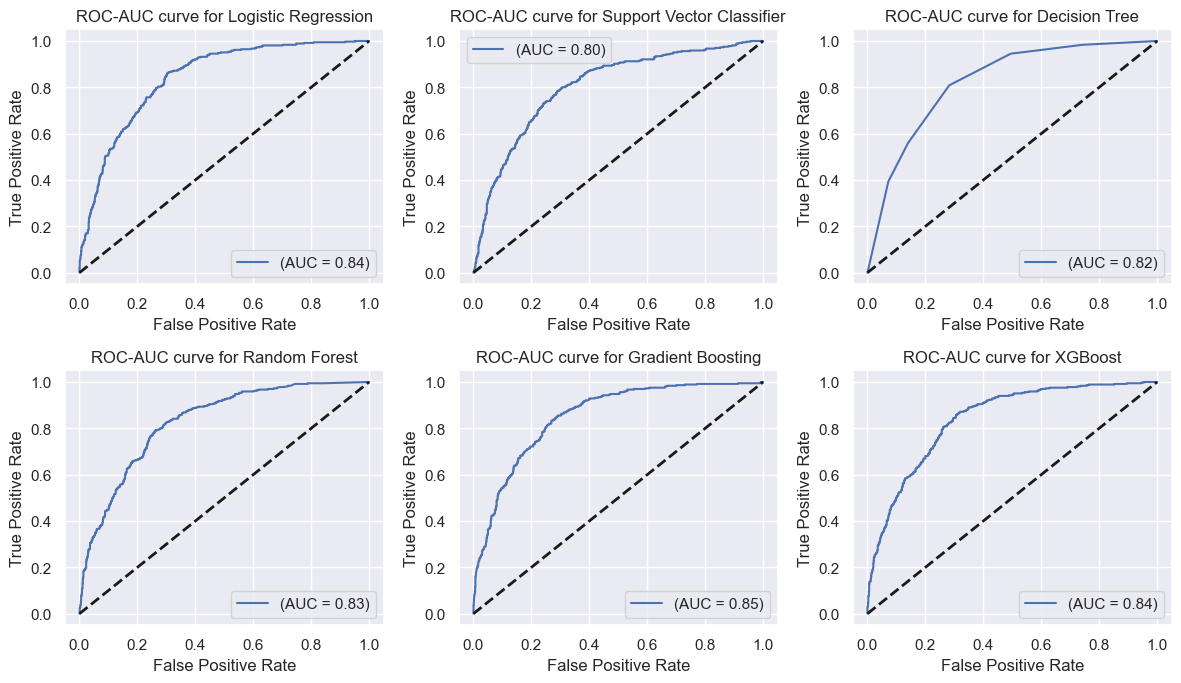

In [93]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

stratified_kfold = StratifiedKFold(n_splits=5)

all_models = {}
plt.figure(figsize=(12, 7))
pt = 1
for model_name, model in models.items():
    
    grid = GridSearchCV(model, param_grids[model_name], cv=stratified_kfold, scoring='recall', n_jobs=-1)
    grid.fit(x_train_balanced, y_train_balanced)
    
    best_model = grid.best_estimator_
    
    print(f'Best Parameter for {model_name}: {grid.best_params_}')


    y_test_pred = best_model.predict(x_test)
    accu = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred)
    rec = recall_score(y_test, y_test_pred)
    
    y_score = best_model.predict_proba(x_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    all_models[model_name] = accu, prec, rec, roc_auc

    plt.subplot(2, 3, pt)
    plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC curve for {model_name}')
    plt.legend()
    pt+=1

plt.tight_layout()
plt.show()

## Model Evaluation

In [94]:
# Compare metrices of models
pd.DataFrame(all_models, index = ['Accuracy', 'Precision', 'Recall', 'AUC'])

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gradient Boosting,XGBoost
Accuracy,0.769723,0.766169,0.741294,0.778962,0.784648,0.769723
Precision,0.543388,0.543124,0.501695,0.567901,0.568928,0.547727
Recall,0.718579,0.636612,0.808743,0.628415,0.710383,0.658470
AUC,0.841933,0.804556,0.824521,0.828940,0.852963,0.840307


I have choosen Gradient Boosting as the best model because i am focusing on recall and auc score because in the context of churn prediction, we want our model to capture as many churners as possible, even if it means mistakenly classifying some customers as churners who may not actually churn.

Maximizing recall ensures that I reduce the risk of missing churners. While I might get some additional false positives (which means contacting some customers who might not actually churn), it's generally more beneficial to over-predict churners than to miss potential ones.

The AUC score is another important metric because it gives us an idea of how well your model distinguishes between the two classes (churn vs. non-churn). A high AUC score means that the model is good at ranking churners higher than non-churners, which is crucial for proactive interventions. Since we're focusing on maximizing recall, a high AUC is a sign that our model is making good predictions and can help in decision-making by ranking churners more confidently.

AUC = 0.85: This value means our model is good at distinguishing between churners (positive class) and non-churners (negative class). It ranks the churners significantly higher than non-churners about 85% of the time when you randomly choose one churner and one non-churner.

Gradient Boosting Classifier will be a model that can help us strike a good balance between capturing churners and having a reasonably effective model in terms of general performance metrics.

In [110]:
best_model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 50, random_state=42)
best_model.fit(x_train_balanced, y_train_balanced)

y_train_pred = best_model.predict(x_train_balanced)
y_test_pred = best_model.predict(x_test)

train_acc = accuracy_score(y_train_balanced, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('Training Accuracy:', train_acc)
print('Testing Accuracy:', test_acc)

Training Accuracy: 0.8007706579135151
Testing Accuracy: 0.7846481876332623


* When tested on unseen data, the model correctly predicted churn status 78.46% of the time.
* The model generalizes well to new data, as the testing accuracy is close to training accuracy.

In [117]:
prec = precision_score(y_test, y_test_pred)
print('Precision score:', round(prec, 2))
rec = recall_score(y_test, y_test_pred)
print('Recall Score:', round(rec, 2))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', round(specificity, 2))

Precision score: 0.57
Recall Score: 0.71
Specificity: 0.81


* Our model has a precision of 57% on the test set means that when the model predicts a customer will leave, it is correct around 57% of the time. A lower precision suggests that some non-churners are being incorrectly classified as churners.
* Our model has a recall of 71%, which means that it correctly identified about 71% of all customers who are actual churners. This indicates that the model is fairly good at capturing churn cases.
* Model has a specificity of 81%, which means it correctly classifies 81% of non-churners, meaning it performs well in identifying customers who will stay.

In [118]:
print('Classification report:\n', classification_report(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      1041
           1       0.57      0.71      0.63       366

    accuracy                           0.78      1407
   macro avg       0.73      0.76      0.74      1407
weighted avg       0.81      0.78      0.79      1407



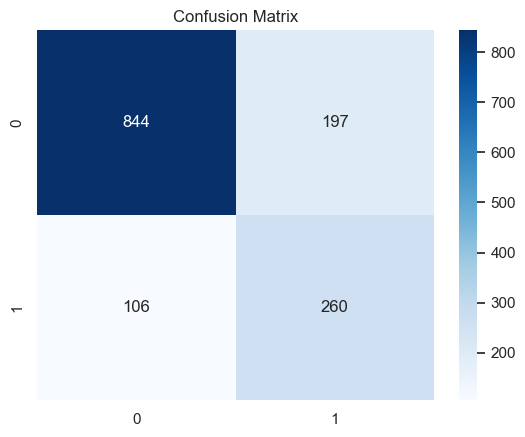

In [119]:
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix')
plt.show()


* True Negatives = 844 -> Customers correctly predicted as non-churners.
* False Positives = 197 -> Customers incorrectly predicted as churners.
* False Negatives  = 106 -> Customers who churned but were predicted to stay.
* True Positives = 260 -> Customers correctly predicted as churners

In [122]:
actual = target_encoder.inverse_transform(y_test)
review = pd.DataFrame(actual, columns = ['Actual Value'])
review['Predicted'] = target_encoder.inverse_transform(y_test_pred)
review

,Actual Value,Predicted
0,No,No
1,Yes,Yes
2,No,No
3,No,Yes
4,Yes,Yes
...,...,...
1402,No,No
1403,No,Yes
1404,Yes,No
1405,No,No


In [123]:
# Export predictions to a CSV
review.to_csv('prediction.csv', index = False)

In [126]:

eval = pd.DataFrame(x_train.columns.to_list(), columns = ['Features'])
eval['Feature Importance%'] = best_model.feature_importances_ * 100
eval = eval.sort_values(by = 'Feature Importance%', ascending=False)
eval


,Features,Feature Importance%
12,Contract,51.934440
3,tenure,18.133373
15,MonthlyCharges,13.752181
5,InternetService,5.590279
6,OnlineSecurity,3.054543
9,TechSupport,2.617238
14,PaymentMethod,1.799094
13,PaperlessBilling,1.252886
7,OnlineBackup,0.696252
2,Dependents,0.481579


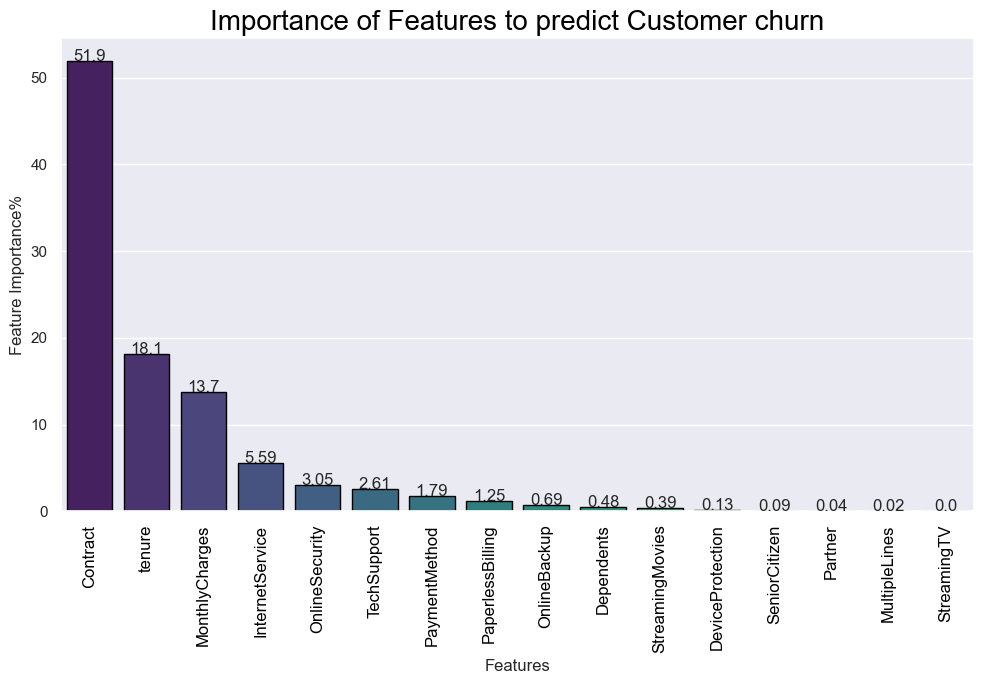

In [127]:
# Visualization
plt.figure(figsize=(10, 7))
sns.barplot(x = eval['Features'], y = eval['Feature Importance%'], palette = 'viridis', edgecolor = 'black')
plt.title('Importance of Features to predict Customer churn', fontsize=20, color = 'black')
plt.xticks(rotation = 90, color= 'black', fontsize = 12)
plt.tight_layout()
for i, j in enumerate(eval['Feature Importance%']):
    plt.text(i,j, str(j)[:4], ha= 'center')
plt.show()


__Insights__
1. Most Influential Features:

* Contract Type (51.93%) → The most significant factor in predicting churn. Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts (one-year or two-year). Offering incentives for long-term contracts (discounts, loyalty benefits) could help reduce churn.
* Tenure (18.13%) → Customers who have been with the company longer are less likely to churn, highlighting loyalty as a key factor. 
* Monthly Charges (13.75%) → Higher monthly charges are associated with higher churn probability, possibly due to cost concerns. New customers and those paying high fees may need retention strategies like discounts or personalized offers.
  
2. Moderate Impact Features:

* Internet Service Type (5.59%) → Certain types of internet services (e.g., fiber-optic) might be linked to higher retention or churn rates.
* Online Security (3.05%) & Tech Support (2.61%) → Customers who subscribe to these services may feel more satisfied and stay longer. Since tech support and online security influence churn, promoting these services might increase retention.

3. Less Significant Features:

* Payment Method (1.80%) & Paperless Billing (1.25%) → How customers pay has some effect on churn, but it’s not as crucial as contract type or tenure.
* Online Backup (0.69%) & Dependents (0.48%) → Having dependents has a small effect on churn, suggesting household structure plays a minor role.
  
4. Negligible or No Impact:

* Streaming TV (0.00%) → This feature has no impact on predicting churn, meaning streaming service usage does not influence whether a customer stays or leaves.
* Multiple Lines (0.02%) & Partner Status (0.04%) → These have minimal importance, indicating that having multiple lines or a partner does not strongly affect churn behavior.

## Dump the neccessary objects

In [128]:
import pickle

# dumping the categorical variable encoder
pickle.dump(encoders, open('encoders.pkl', 'wb'))
# dumping the standardizing scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))
# dumping the target variable encoder
pickle.dump(target_encoder, open('target_encoder.pkl', 'wb'))
# dumping the model
pickle.dump(best_model, open('model.pkl', 'wb'))
